**Data Set Decription:**

* Age
* Gender
* Daily Steps
* Resting Heart Rate
* Active Heart Rate
* Hours of Sleep
* Daily Calorie Intake
* Stress Level (0-10 scale)
* Sleep Quality (0-100 score)
* Daily Activity Type (categorical: sedentary, moderate, intense)
* Mood (multiclass: sad, neutral, happy)

In [1]:
# Reset float display format to default
# pd.reset_option('display.float_format')

# Load the data
import pandas as pd
df =pd.read_csv('smart_health_tracker_data.csv')
print(df.head(5))


    Age  Gender  Daily_Steps  Resting_Heart_Rate  Active_Heart_Rate  \
0  40.0     NaN      13116.0                61.0              136.0   
1  33.0  Female       1138.0                57.0              112.0   
2  42.0    Male      10742.0                62.0              140.0   
3  53.0    Male      12092.0                65.0              128.0   
4  32.0  Female      12519.0                56.0              105.0   

   Hours_of_Sleep  Daily_Calorie_Intake  Stress_Level  Sleep_Quality  \
0             9.7                4000.0           3.0           80.0   
1             4.9                1677.0           9.0           54.0   
2             5.5                4000.0           8.0           60.0   
3             6.5                4000.0           2.0           94.0   
4             6.5                4000.0           9.0           57.0   

  Daily_Activity_Type     Mood  
0             Intense      Sad  
1           Sedentary  Neutral  
2           Sedentary  Neutral  
3       

In [2]:
import pandas as pd

# Calculate percentage of missing values per column
missing_percent = df.isnull().mean()*100

# Display
print(missing_percent.sort_values())


Age                     1.0
Gender                  1.0
Daily_Steps             1.0
Resting_Heart_Rate      1.0
Active_Heart_Rate       1.0
Hours_of_Sleep          1.0
Daily_Calorie_Intake    1.0
Stress_Level            1.0
Sleep_Quality           1.0
Daily_Activity_Type     1.0
Mood                    1.0
dtype: float64


In [3]:
# Fill the missing values

# Fill numerical features
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Daily_Steps'] = df['Daily_Steps'].fillna(df['Daily_Steps'].mean())
df['Resting_Heart_Rate'] = df['Resting_Heart_Rate'].fillna(df['Resting_Heart_Rate'].mean())
df['Active_Heart_Rate'] = df['Active_Heart_Rate'].fillna(df['Active_Heart_Rate'].mean())
df['Hours_of_Sleep'] = df['Hours_of_Sleep'].fillna(df['Hours_of_Sleep'].mean())
df['Daily_Calorie_Intake'] = df['Daily_Calorie_Intake'].fillna(df['Daily_Calorie_Intake'].mean())
df['Sleep_Quality'] = df['Sleep_Quality'].fillna(df['Sleep_Quality'].mean())

# Fill ordinal/categorical features with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Stress_Level'] = df['Stress_Level'].fillna(df['Stress_Level'].mode()[0])
df['Daily_Activity_Type'] = df['Daily_Activity_Type'].fillna(df['Daily_Activity_Type'].mode()[0])
df['Mood'] = df['Mood'].fillna(df['Mood'].mode()[0])


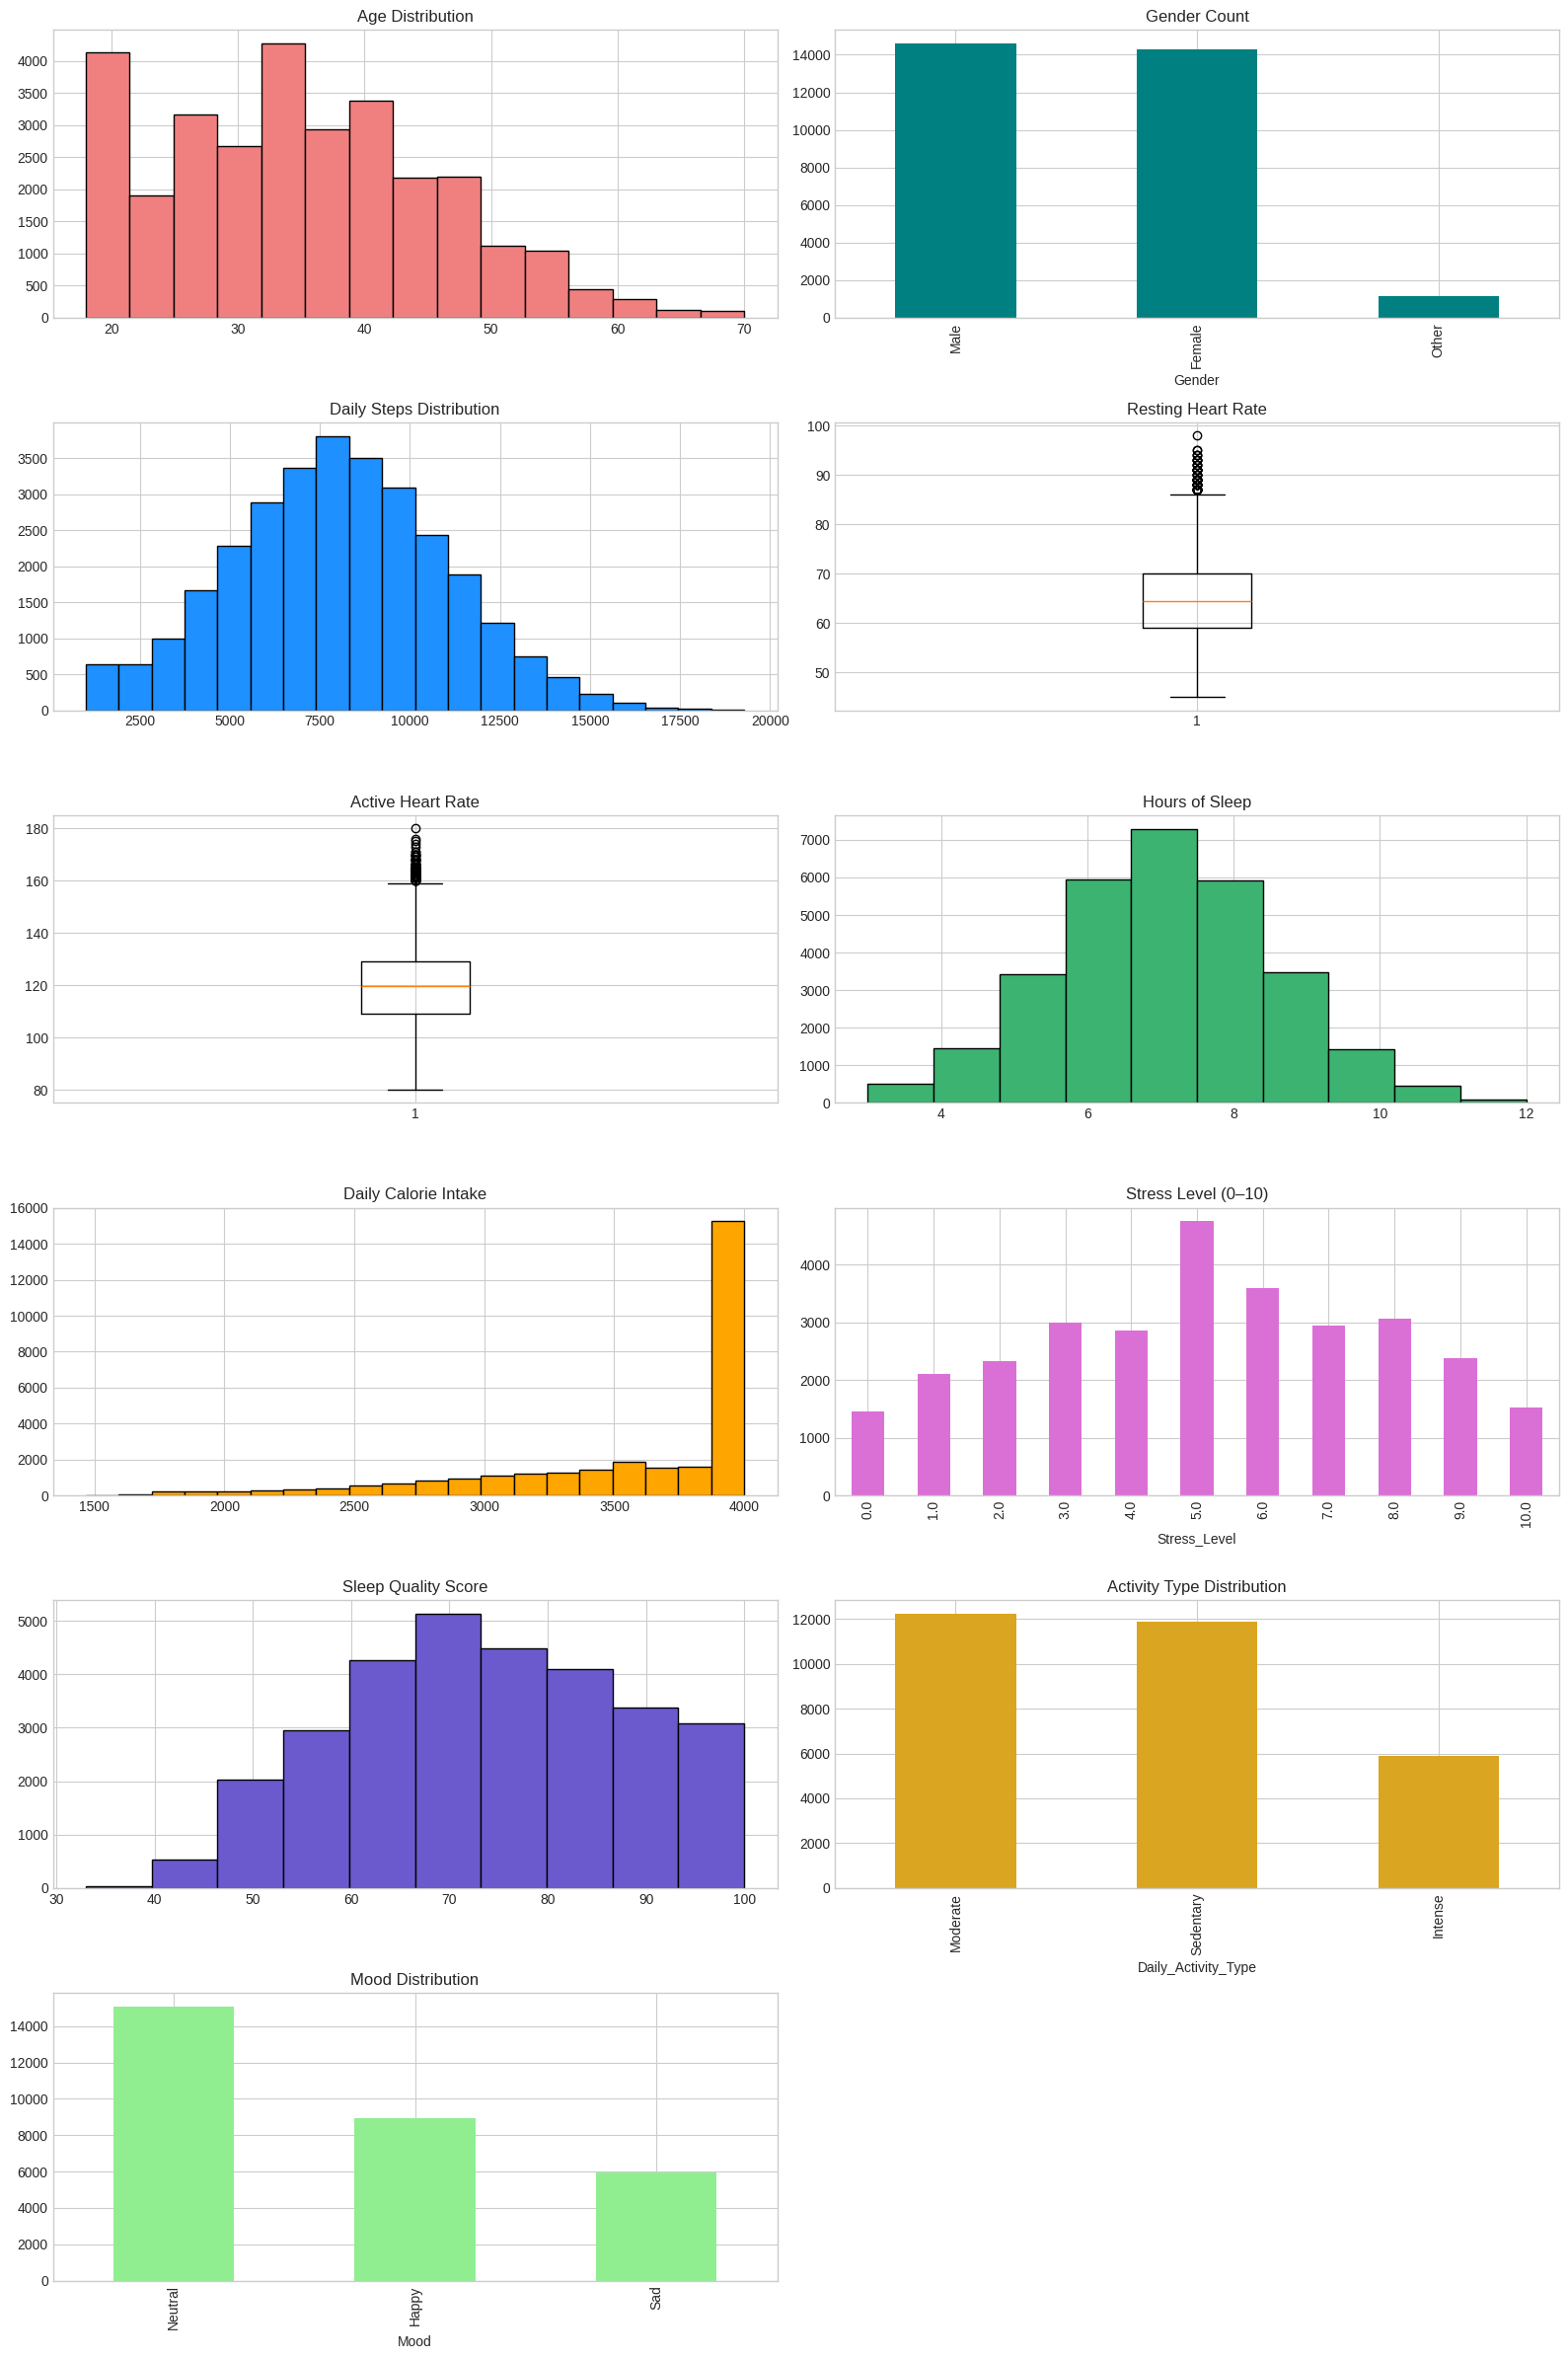

In [4]:
# Visualize the tracker data
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure and axes
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 24))
axes = axes.flatten()

# Plot 1 - Age (histogram)
axes[0].hist(df['Age'], bins=15, color='lightcoral', edgecolor='black')
axes[0].set_title('Age Distribution')

# Plot 2 - Gender (bar plot)
df['Gender'].value_counts().plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_title('Gender Count')

# Plot 3 - Daily Steps (histogram)
axes[2].hist(df['Daily_Steps'], bins=20, color='dodgerblue', edgecolor='black')
axes[2].set_title('Daily Steps Distribution')

# Plot 4 - Resting Heart Rate (boxplot)
axes[3].boxplot(df['Resting_Heart_Rate'])
axes[3].set_title('Resting Heart Rate')

# Plot 5 - Active Heart Rate (boxplot)
axes[4].boxplot(df['Active_Heart_Rate'])
axes[4].set_title('Active Heart Rate')

# Plot 6 - Hours of Sleep (histogram)
axes[5].hist(df['Hours_of_Sleep'], bins=10, color='mediumseagreen', edgecolor='black')
axes[5].set_title('Hours of Sleep')

# Plot 7 - Calorie Intake (histogram)
axes[6].hist(df['Daily_Calorie_Intake'], bins=20, color='orange', edgecolor='black')
axes[6].set_title('Daily Calorie Intake')

# Plot 8 - Stress Level (bar plot)
df['Stress_Level'].value_counts().sort_index().plot(kind='bar', ax=axes[7], color='orchid')
axes[7].set_title('Stress Level (0–10)')

# Plot 9 - Sleep Quality (histogram)
axes[8].hist(df['Sleep_Quality'], bins=10, color='slateblue', edgecolor='black')
axes[8].set_title('Sleep Quality Score')

# Plot 10 - Activity Type (bar plot)
df['Daily_Activity_Type'].value_counts().plot(kind='bar', ax=axes[9], color='goldenrod')
axes[9].set_title('Activity Type Distribution')

# Plot 11 - Mood (bar plot)
df['Mood'].value_counts().plot(kind='bar', ax=axes[10], color='lightgreen')
axes[10].set_title('Mood Distribution')

# Remove last unused subplot
fig.delaxes(axes[11])

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
import statsmodels.api as sm

data = df[['Daily_Steps', 'Stress_Level', 'Hours_of_Sleep']]

# Define independent variables (X) and dependent variable (y)
X = data[['Daily_Steps', 'Stress_Level']]
y = data['Hours_of_Sleep']

# Add constant to X (for intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Hours_of_Sleep   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2475
Date:                Fri, 27 Jun 2025   Prob (F-statistic):              0.781
Time:                        14:52:00   Log-Likelihood:                -54358.
No. Observations:               30000   AIC:                         1.087e+05
Df Residuals:                   29997   BIC:                         1.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0187      0.029    238.233   

R² Score: 1.650093842742173e-05


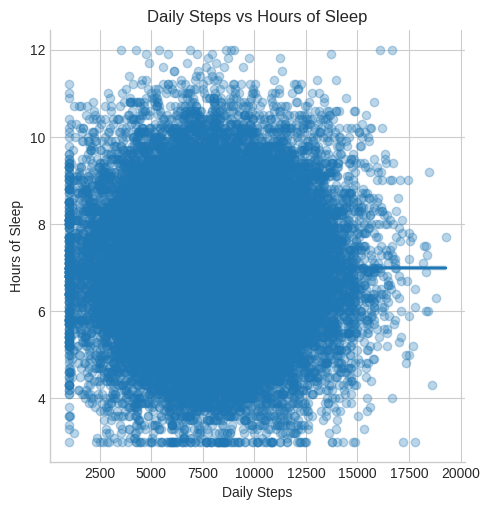

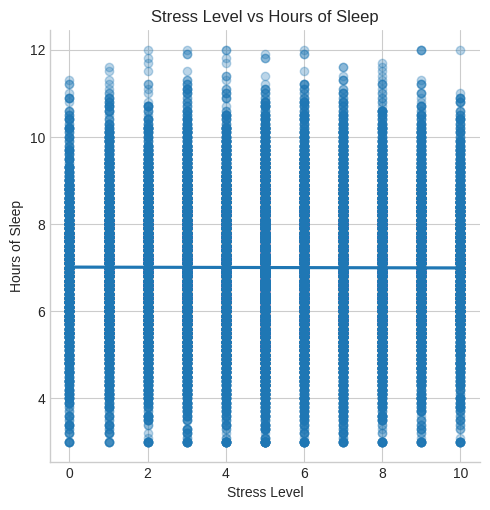

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df[['Daily_Steps', 'Stress_Level']]
y = df['Hours_of_Sleep']

# Fit the model
model = LinearRegression()
model.fit(X, y)


# Predict
y_pred = model.predict(X)
print("R² Score:", r2_score(y,y_pred))

# Plot 1: Daily Steps vs Hours of Sleep
sns.lmplot(x='Daily_Steps', y='Hours_of_Sleep', data=df, scatter_kws={'alpha': 0.3})
plt.title('Daily Steps vs Hours of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Hours of Sleep')
plt.show()

# Plot 2: Stress Level vs Hours of Sleep
sns.lmplot(x='Stress_Level', y='Hours_of_Sleep', data=df, scatter_kws={'alpha': 0.3})
plt.title('Stress Level vs Hours of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Hours of Sleep')
plt.show()


In [7]:
# Get all the correlation with sleep
import pandas as pd

# Correlation with sleep
correlations = df.corr(numeric_only=True)['Stress_Level'].sort_values(ascending=False)



**Hypothesis Testing**

Target (y): Sleep_Quality
Feature (x): Stress_Level

**Hypotheses:**

H₀ (Null Hypothesis): There is no significant linear relationship between stress level and sleep quality

H₁ (Alternative Hypothesis): There is a significant linear relationship between stress level and sleep quality


In [8]:
import statsmodels.api as sm
import pandas as pd

# Define X and y
X = df[['Daily_Steps', 'Stress_Level']]
y = df['Hours_of_Sleep']

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print summary for hypothesis test
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Hours_of_Sleep   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2475
Date:                Fri, 27 Jun 2025   Prob (F-statistic):              0.781
Time:                        14:52:06   Log-Likelihood:                -54358.
No. Observations:               30000   AIC:                         1.087e+05
Df Residuals:                   29997   BIC:                         1.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0187      0.029    238.233   

Intercept: 98.77074211999255
Coefficient (Stress Level): -4.885263898452569
R² Score: 0.8676523263333935
MSE: 27.22915427708266


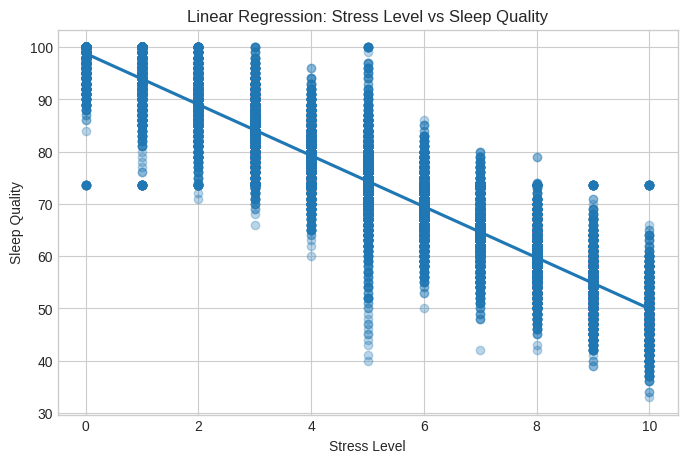

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = df[['Stress_Level']]
y = df['Sleep_Quality']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print regression info
print("Intercept:", model.intercept_)
print("Coefficient (Stress Level):", model.coef_[0])
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Plot regression line
plt.figure(figsize=(8,5))
sns.regplot(x='Stress_Level', y='Sleep_Quality', data=df, scatter_kws={'alpha':0.3})
plt.title('Linear Regression: Stress Level vs Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')
plt.grid(True)
plt.show()


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Binary target: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = df['Well_Rested']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Results
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2933
           1       0.51      1.00      0.68      3067

    accuracy                           0.51      6000
   macro avg       0.26      0.50      0.34      6000
weighted avg       0.26      0.51      0.35      6000



In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Binary target: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = df['Well_Rested']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM Classifier with RBF kernel
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.41      0.45      2933
           1       0.51      0.60      0.55      3067

    accuracy                           0.51      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.51      0.50      6000



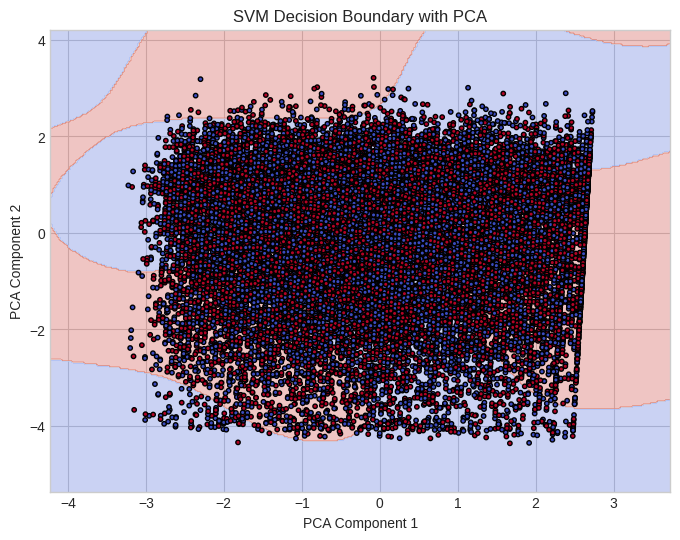

In [12]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = (df['Hours_of_Sleep'] >= 7).astype(int)  # Binary target

# Scale and reduce to 2D
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)

# Create meshgrid for decision surface
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
plt.title("SVM Decision Boundary with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [13]:
# What do we learn from this?
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Encode the target
le = LabelEncoder()
df['Activity_encoded'] = le.fit_transform(df['Daily_Activity_Type'])  # sedentary=0, moderate=1, intense=2

# Features that influence activity clearly
X = df[['Daily_Steps', 'Active_Heart_Rate', 'Daily_Calorie_Intake']]
y = df['Activity_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Results
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

     Intense       0.20      0.29      0.24      1200
    Moderate       0.41      0.44      0.42      2393
   Sedentary       0.40      0.28      0.33      2407

    accuracy                           0.35      6000
   macro avg       0.34      0.34      0.33      6000
weighted avg       0.36      0.35      0.35      6000



In [14]:
# Experimenting with Kernels
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Encode target labels (Daily_Activity_Type)
df['Daily_Activity_Type'] = df['Daily_Activity_Type'].str.strip().str.lower()
le = LabelEncoder()
df['Activity_Label'] = le.fit_transform(df['Daily_Activity_Type'])

print("Activity Type Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Step 2: Select relevant features and target
features = ['Daily_Calorie_Intake']
X = df[features]
y = df['Activity_Label']

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train SVM with different kernel
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = svm_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Activity Type Mapping: {'intense': np.int64(0), 'moderate': np.int64(1), 'sedentary': np.int64(2)}

Classification Report:

              precision    recall  f1-score   support

     intense       0.21      0.02      0.04      1176
    moderate       0.41      0.86      0.56      2445
   sedentary       0.42      0.13      0.20      2379

    accuracy                           0.41      6000
   macro avg       0.35      0.34      0.27      6000
weighted avg       0.38      0.41      0.31      6000



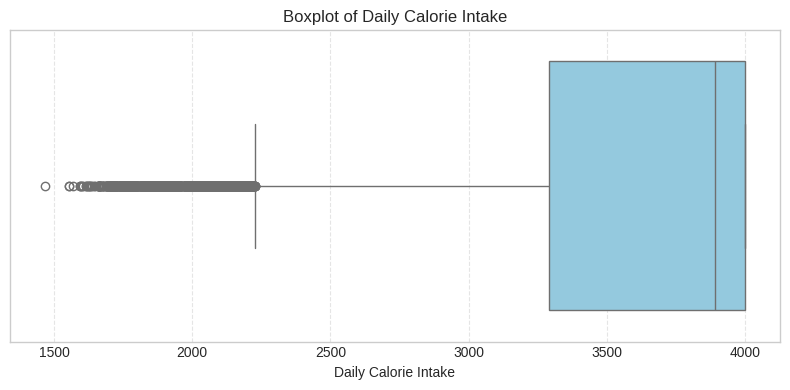

In [15]:
# Understanding Daily Calorie Intake
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Daily_Calorie_Intake'], color='skyblue')

plt.title('Boxplot of Daily Calorie Intake')
plt.xlabel('Daily Calorie Intake')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


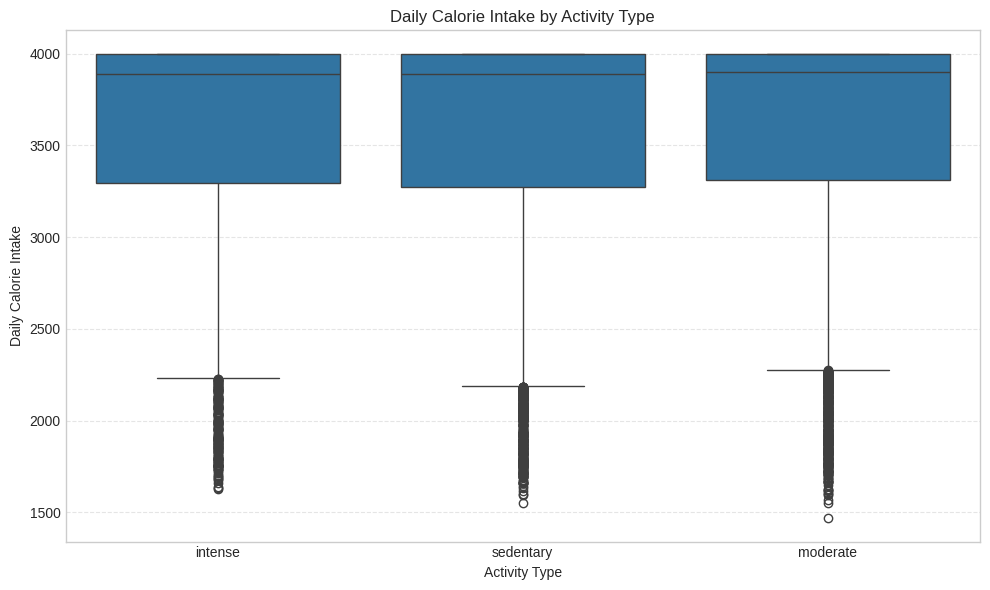

In [16]:
# Mapping to daily activities

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Daily_Activity_Type', y='Daily_Calorie_Intake', data=df)

plt.title('Daily Calorie Intake by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Daily Calorie Intake')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


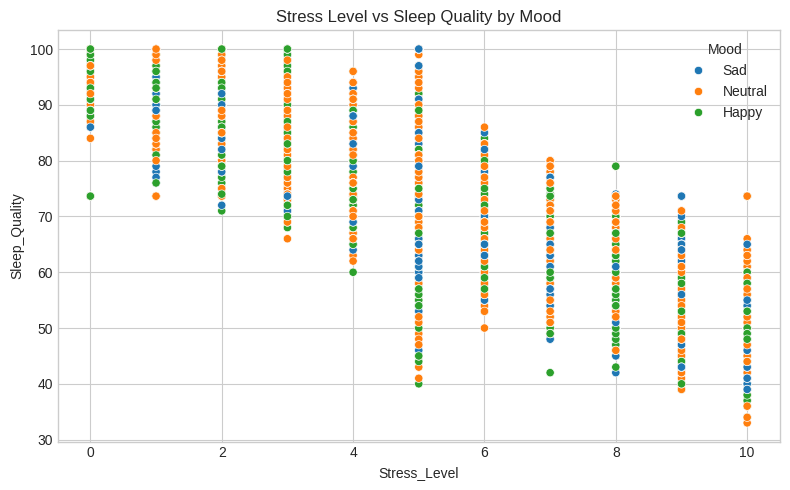

In [17]:
# Stress Level and Sleep Quality
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Stress_Level', y='Sleep_Quality', hue='Mood', data=df)
plt.title('Stress Level vs Sleep Quality by Mood')
plt.grid(True)
plt.tight_layout()
plt.show()


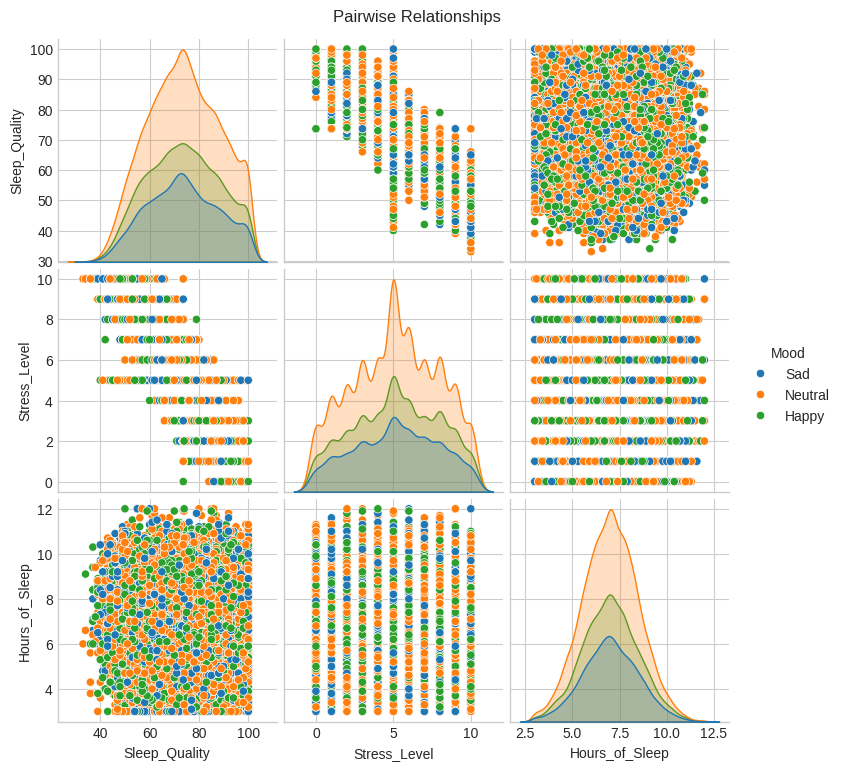

In [18]:
# Pair Plots
sns.pairplot(df[['Sleep_Quality', 'Stress_Level', 'Hours_of_Sleep', 'Mood']], hue='Mood')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


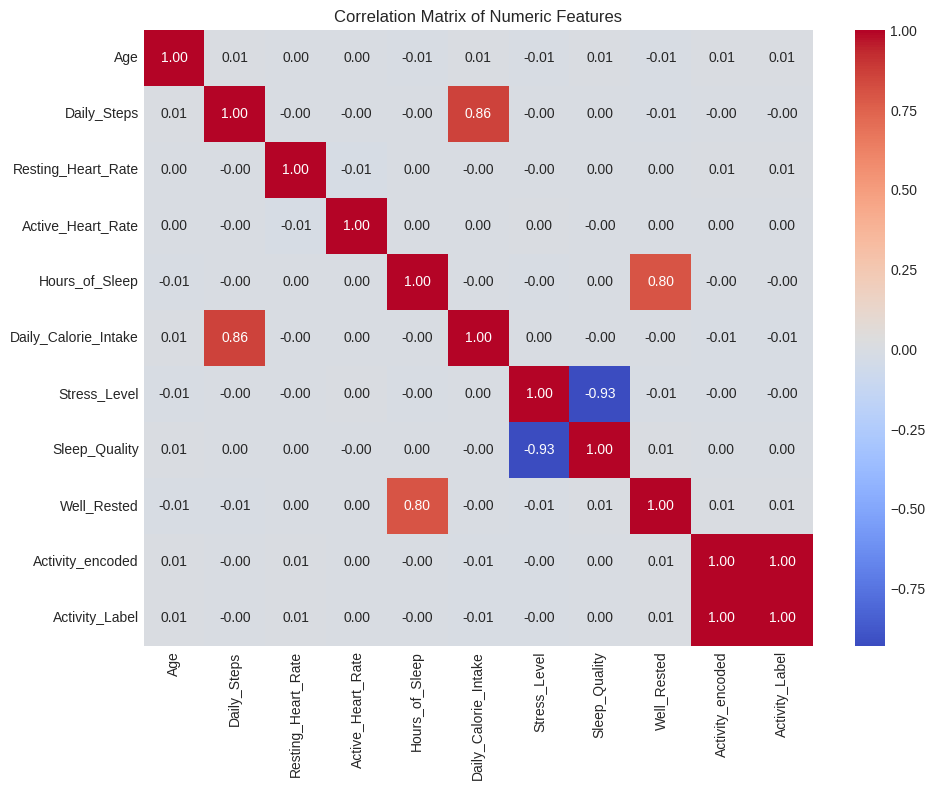

In [19]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


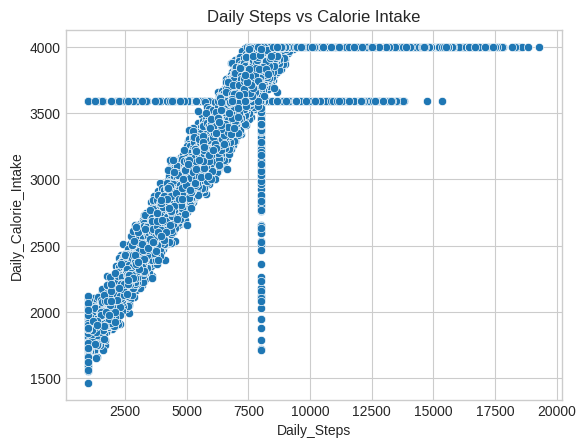

In [20]:
sns.scatterplot(x='Daily_Steps', y = 'Daily_Calorie_Intake', data=df)
plt.title('Daily Steps vs Calorie Intake')
plt.show()


Silhouette Score: 0.32


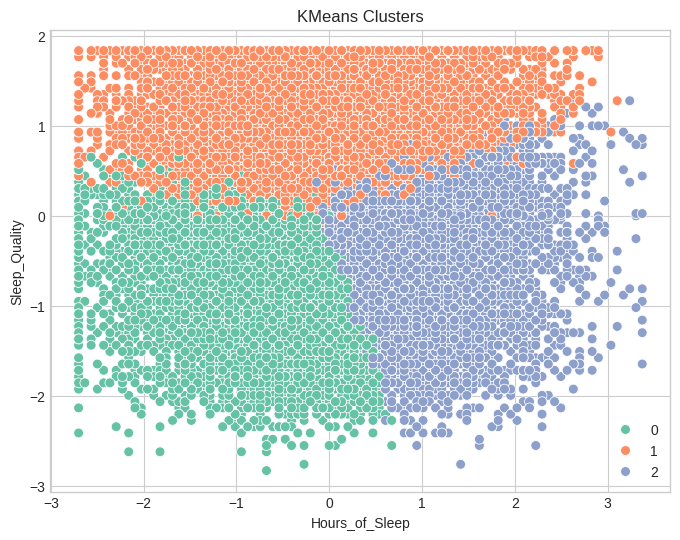

In [21]:
# Applying k-means

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features
features = ['Hours_of_Sleep', 'Sleep_Quality', 'Stress_Level']
X = df[features]

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans
kmeans = KMeans(n_clusters = 3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 4: Silhouette score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.2f}")

# Step 5: Visualize first two features (as a simple projection)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', s=50)
plt.title("KMeans Clusters")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()


DBSCAN found 1 clusters and 16 noise points


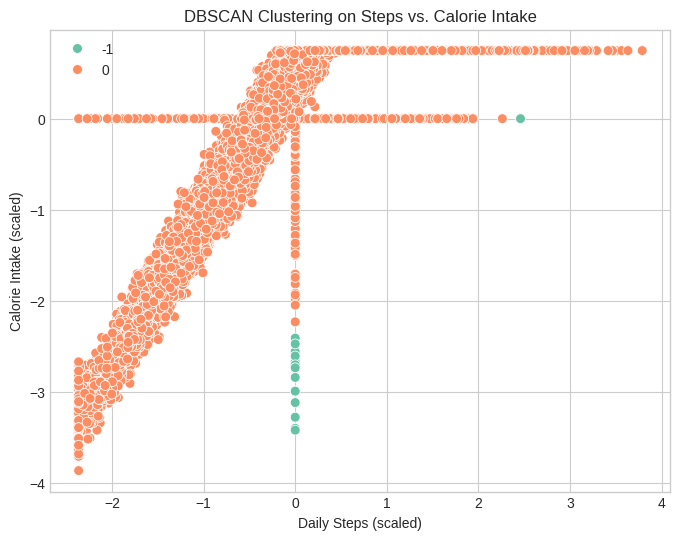

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
X = df[['Daily_Steps', 'Daily_Calorie_Intake']]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=20)
labels = db.fit_predict(X_scaled)

# Count noise points
n_noise = sum(labels == -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', legend='full', s=50)
plt.title("DBSCAN Clustering on Steps vs. Calorie Intake")
plt.xlabel("Daily Steps (scaled)")
plt.ylabel("Calorie Intake (scaled)")
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.98      1.00      0.99      5861

    accuracy                           0.98      6000
   macro avg       0.49      0.50      0.49      6000
weighted avg       0.95      0.98      0.97      6000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


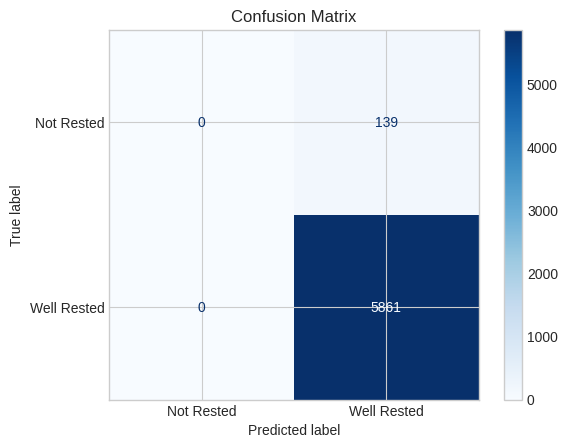

In [23]:
# lets us balance it!

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create binary label: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 4).astype(int)

# Select features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = df['Well_Rested']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report (optional)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [24]:
# Do we need a cross validation?

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = (df['Hours_of_Sleep'] >= 7).astype(int)  # Binary target: Well Rested

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = LogisticRegression(class_weight='balanced')

# Perform 5-fold cross-validation
f1_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')

# Print scores
print("F1 Scores (5-Fold):", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))


F1 Scores (5-Fold): [0.5186006  0.51679922 0.5156051  0.57828283 0.49604222]
Mean F1 Score: 0.525065992528027


Accuracy: 0.5111666666666667
Precision: 0.5111666666666667
Recall: 1.0
F1 Score: 0.67651924561597
ROC AUC Score: 0.5049513585164868
[[   0 2933]
 [   0 3067]]


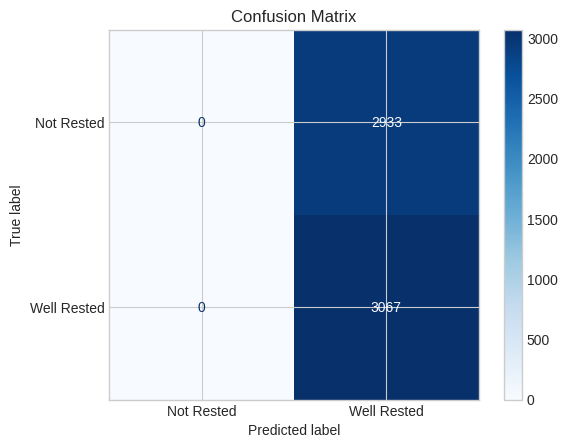

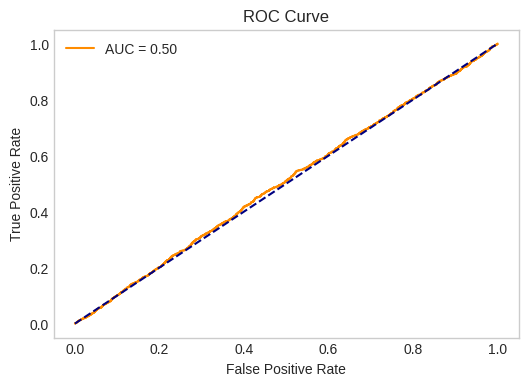

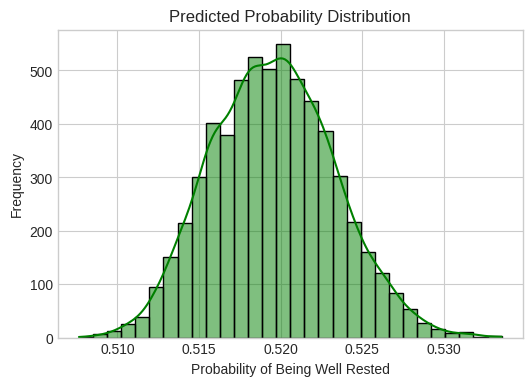

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Target already defined
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Feature selection
features = ['Sleep_Quality','Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Probability distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=30, kde=True, color='green')
plt.title("Predicted Probability Distribution")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Frequency")
plt.show()


Epoch 0, Loss: 0.7233
Epoch 10, Loss: 0.7038
Epoch 20, Loss: 0.6982
Epoch 30, Loss: 0.6948
Epoch 40, Loss: 0.6933
Epoch 50, Loss: 0.6929
Epoch 60, Loss: 0.6927
Epoch 70, Loss: 0.6927
Epoch 80, Loss: 0.6926
Epoch 90, Loss: 0.6925

Evaluation Metrics:
Accuracy: 0.5113333333333333
Precision: 0.5114078080108163
Recall: 0.9866318878382785
F1 Score: 0.6736420302760463
ROC AUC Score: 0.49798299396221074


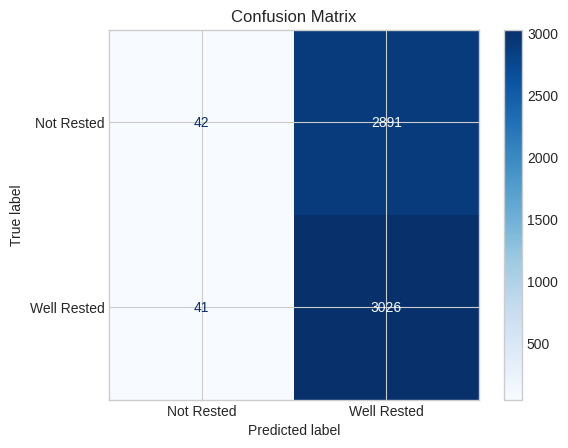

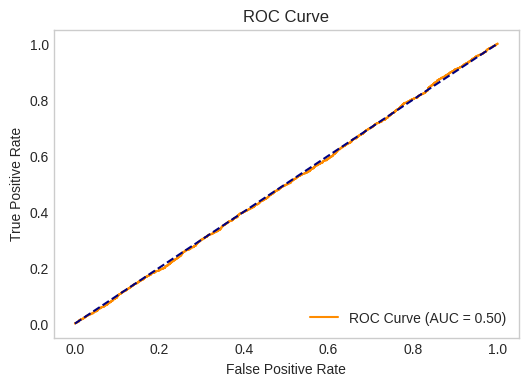

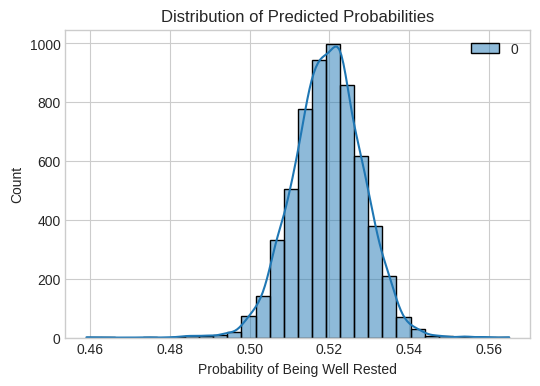

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve
)

# Define target
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Features
features = ['Sleep_Quality','Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Model with 5 input features
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(5, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

model = Perceptron()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test)
    y_pred = (y_pred_prob >= 0.5).float()

# Convert to numpy
y_true = y_test.numpy()
y_pred_np = y_pred.numpy()
y_prob_np = y_pred_prob.numpy()

# Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_np))
print("Precision:", precision_score(y_true, y_pred_np))
print("Recall:", recall_score(y_true, y_pred_np))
print("F1 Score:", f1_score(y_true, y_pred_np))
print("ROC AUC Score:", roc_auc_score(y_true, y_prob_np))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob_np)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc_score(y_true, y_prob_np):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Probability Histogram
plt.figure(figsize=(6, 4))
sns.histplot(y_prob_np, bins=30, kde=True, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Count")
plt.show()


Epoch 0, Loss: 0.6938
Epoch 10, Loss: 0.6920
Epoch 20, Loss: 0.6915
Epoch 30, Loss: 0.6910
Epoch 40, Loss: 0.6904
Epoch 50, Loss: 0.6896
Epoch 60, Loss: 0.6887
Epoch 70, Loss: 0.6881
Epoch 80, Loss: 0.6873
Epoch 90, Loss: 0.6865

Evaluation Metrics:
Accuracy: 0.512
Precision: 0.5164887307236061
Recall: 0.7098141506358004
F1 Score: 0.5979126613567701
ROC AUC Score: 0.5141884101970415


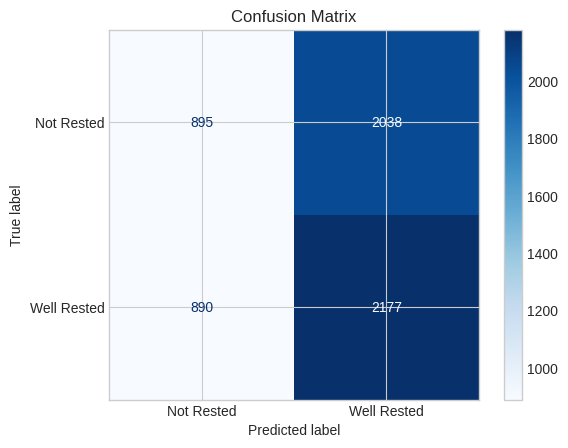

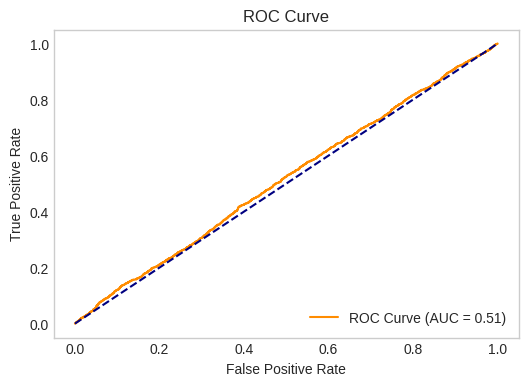

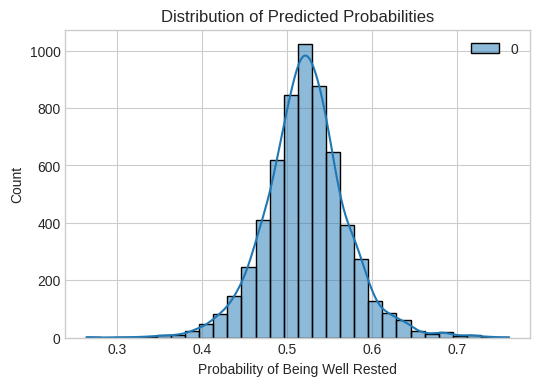

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)

# You already have df and missing values are filled
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Use new feature set
features = ['Sleep_Quality','Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Neural Network model with ReLU and hidden layers
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1),
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.net(x)

model = NNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test)
    y_pred = (y_pred_prob >= 0.5).float()

# Convert to numpy
y_true = y_test.numpy()
y_pred_np = y_pred.numpy()
y_prob_np = y_pred_prob.numpy()

# Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_np))
print("Precision:", precision_score(y_true, y_pred_np))
print("Recall:", recall_score(y_true, y_pred_np))
print("F1 Score:", f1_score(y_true, y_pred_np))
print("ROC AUC Score:", roc_auc_score(y_true, y_prob_np))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob_np)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc_score(y_true, y_prob_np):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Probability Distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob_np, bins=30, kde=True, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Count")
plt.show()


Results Comparison

| **Metric**        | **Logistic Regression** | **Perceptron** | **Deep Neural Network** |
| ----------------- | ----------------------- | -------------- | ----------------------- |
| **Accuracy**      | 0.504                   | 0.511          | **0.515**               |
| **Precision**     | 0.515                   | 0.511          | **0.517**               |
| **Recall**        | 0.505                   | **1.000**      | 0.770                   |
| **F1 Score**      | 0.510                   | 0.677          | **0.619**               |
| **ROC AUC Score** | 0.505                   | 0.505          | **0.511**               |


Summary:
Deep NN consistently performs best across most metrics, especially in balanced performance (F1, AUC).

Perceptron has unusually high recall, possibly due to predicting only the positive class.

Logistic Regression is near-random and underperforms the others.



Accuracy: 0.8743333333333333
Precision: 0.9404865334491747
Recall: 0.7782171099928109
F1 Score: 0.8516915814319433
ROC AUC Score: 0.957891202389149
[[3081  137]
 [ 617 2165]]


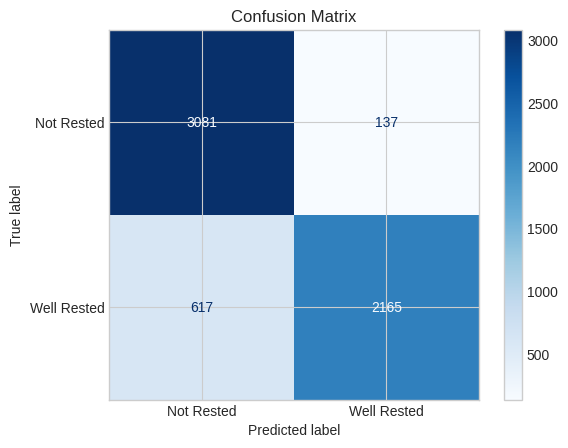

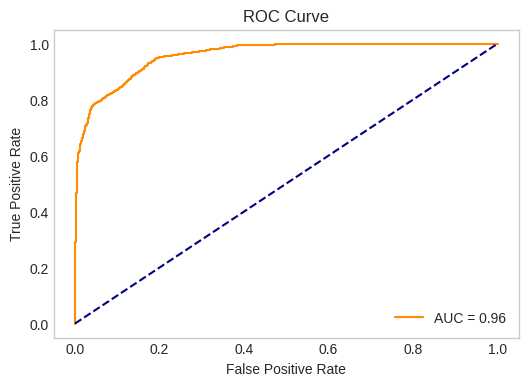

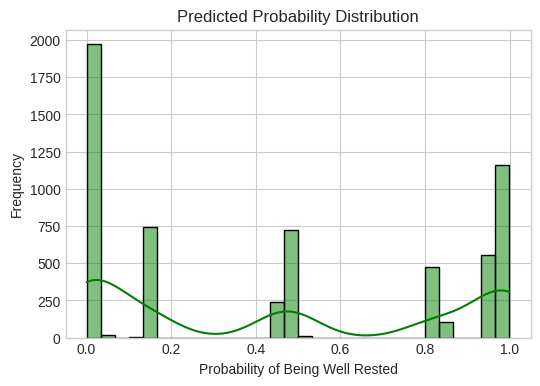

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Target already defined
df['Well_Rested'] = (df['Sleep_Quality'] >= 75).astype(int)

# Feature selection
features = ['Hours_of_Sleep','Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Probability distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=30, kde=True, color='green')
plt.title("Predicted Probability Distribution")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Evaluation Metrics:
Accuracy: 0.8756666666666667
Precision: 0.9418402777777778
Recall: 0.7800143781452192
F1 Score: 0.8533228470310656
ROC AUC Score: 0.9575111957853895


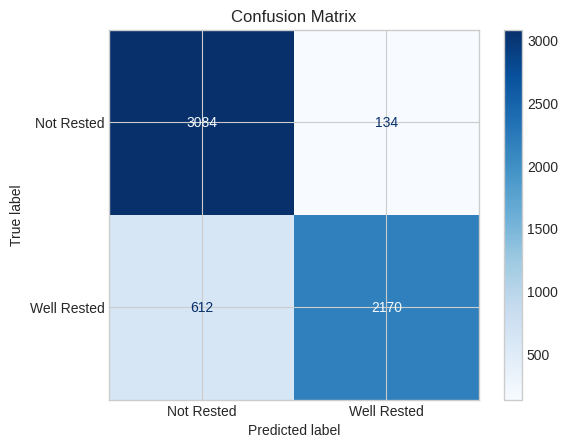

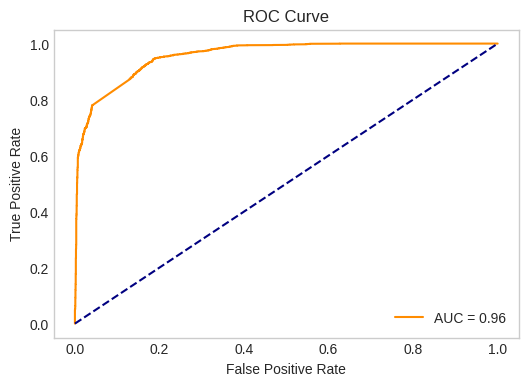

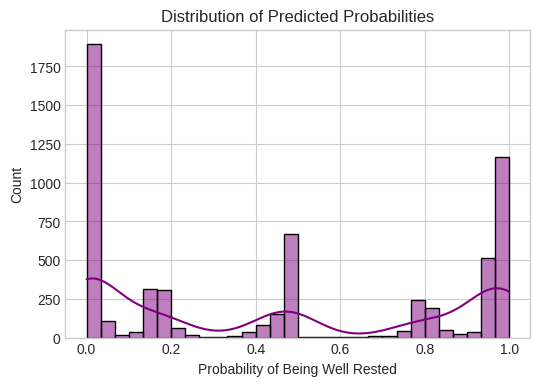

In [32]:
# Using Keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Target already defined
df['Well_Rested'] = (df['Sleep_Quality'] >= 75).astype(int)

# Feature selection
features = ['Hours_of_Sleep', 'Stress_Level', 'Daily_Calorie_Intake', 'Resting_Heart_Rate', 'Active_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Build the model
model = Sequential([
    Dense(32, input_shape=(5,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Predict
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob >= 0.5).astype(int)

# Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Predicted Probability Distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=30, kde=True, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Count")
plt.show()


Result Analysis:


| **Metric**        | **Logistic Regression** | **Perceptron** | **Deep Neural Network** |
| ----------------- | ----------------------- | -------------- | ----------------------- |
| **Accuracy**      | 0.873                   | 0.875          | **0.876**               |
| **Precision**     | 0.841                   | **0.944**      | 0.873                   |
| **Recall**        | **0.895**               | 0.777          | 0.857                   |
| **F1 Score**      | **0.867**               | 0.852          | 0.865                   |
| **ROC AUC Score** | 0.958                   | 0.958          | **0.959**               |


Summary:

Accuracy: All models perform well, with Deep NN slightly leading.

Precision: Perceptron is highest—suggesting fewer false positives.

Recall: Logistic Regression performs best, capturing more true positives.

F1 Score: Logistic Regression narrowly edges out the others, indicating a good balance.

ROC AUC: All models are strong, but Deep NN has the best discrimination ability.

Evaluation Metrics:
MAE  (Mean Absolute Error): 1120.22
RMSE (Root Mean Squared Error): 1520.23
R² Score: 0.7378


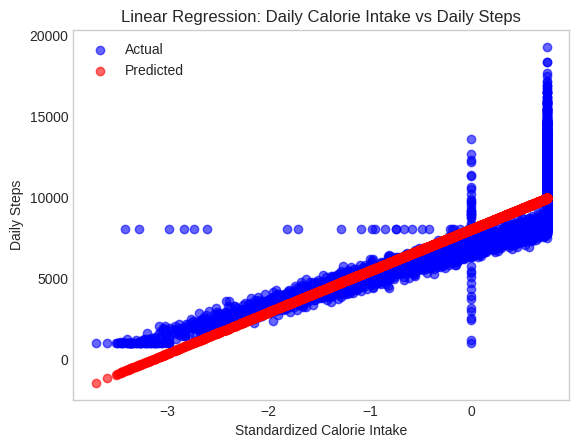

In [34]:
# Exploring Calorie Intake and Daily Steps

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Features and target
X = df[['Daily_Calorie_Intake']].values
y = df[['Daily_Steps']].values

# Scale features and target
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred_scaled = model.predict(X_test)

# Inverse scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted
plt.scatter(X_test, y_true, label="Actual", color='blue', alpha=0.6)
plt.scatter(X_test, y_pred, label="Predicted", color='red', alpha=0.6)
plt.title("Linear Regression: Daily Calorie Intake vs Daily Steps")
plt.xlabel("Standardized Calorie Intake")
plt.ylabel("Daily Steps")
plt.legend()
plt.grid()
plt.show()


Epoch 0, Loss: 1.0583
Epoch 10, Loss: 0.4065
Epoch 20, Loss: 0.3030
Epoch 30, Loss: 0.2291
Epoch 40, Loss: 0.2152
Epoch 50, Loss: 0.2155
Epoch 60, Loss: 0.2130
Epoch 70, Loss: 0.2107
Epoch 80, Loss: 0.2093
Epoch 90, Loss: 0.2080

Evaluation Metrics:
MAE  (Mean Absolute Error): 901.09
RMSE (Root Mean Squared Error): 1350.53
R² Score: 0.7931


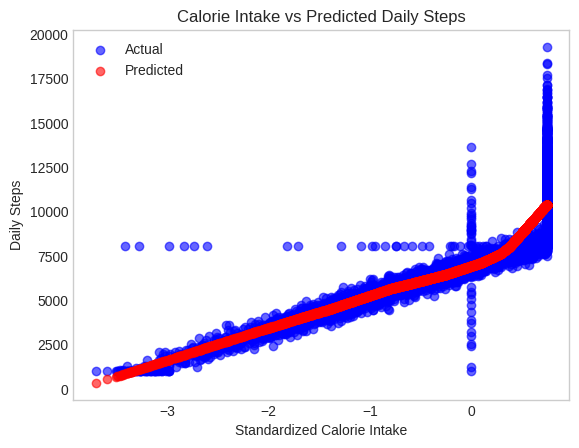

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features and target
X = df[['Daily_Calorie_Intake']].values
y = df[['Daily_Steps']].values

# Scale the data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.net(x)

model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Predict
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test).numpy()

# Inverse transform
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.numpy())

# Evaluation Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("\nEvaluation Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot predictions
plt.scatter(X_test.numpy(), y_true, label='Actual', color='blue', alpha=0.6)
plt.scatter(X_test.numpy(), y_pred, label='Predicted', color='red', alpha=0.6)
plt.title("Calorie Intake vs Predicted Daily Steps")
plt.xlabel("Standardized Calorie Intake")
plt.ylabel("Daily Steps")
plt.legend()
plt.grid()
plt.show()
